In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

**Name**: Anshul Doshi (ad3222)
**Collaborators**: Edwin Vargas

# HW 3:  Interpolation

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** (20 points) Analytically find the interpolating polynomial $P(x)$ in the basis
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Newton: $P(x) = \sum^2_{i=0} a_i n_i(x)$

**Monomial Solution**

Consider $P_2(x) = p_0 + p_1 x + p_2 x^2$ with the three data points. We have three equations and three unknowns as expected:

$$P_2(x_0) = p_0 + p_1 x_0 + p_2 x_0^2  = y_0$$

$$P_2(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 = y_1$$

$$P_2(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 = y_2$$

Using the Vandermonde Matrix:

$$
V = \begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 
\end{bmatrix}
$$

$$\begin{bmatrix} 
     1 & x_0 & x_0^2  \\
     1 & x_1 & x_1^2  \\
     1 & x_2 & x_2^2  
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2  \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \end{bmatrix}$$

Plugging in our given data points:

$$\begin{bmatrix} 
     1 & 0 & 0  \\
     1 & 1 & 1  \\
     1 & 2 & 4  
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2  \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \end{bmatrix}$$

Solving for our coefficents p:

$$p_0 = 0$$
$$p_1 + p_2 = 2$$
$$2p_1 + 4p_2 = 2$$

Solving this systems gives:

$$p_0 = 0, p_1 = 3, p_2 = -1$$

Therefore our polynomial is:

$$P_2 = 3x - x^2$$

**Newton's Method**

In general then $P_N(x)$ can be written in Newton's form as

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

In our case with three points we have:

$$P_2(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2]$$

Solving for the bracketed quantities:

$$[y_0] = y_0 = 0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{2}{1} = 2$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} = 0 - \frac{2}{2} = -1$$

Plugging in:

$$P_2(x) = 0 + (x)(2) + (x) (x - 1)(-1) = 2x - x^2 + x$$

$$P_2(x) = 3x - x^2$$


**(b)** (10 points) Show that these all lead to the same polynomial (show that $P(x)$ is in fact unique).

**Solution/Proof**

Consider the two general forms of the Monomial and Newton method polynomials:

$$P_2(x) = p_0 + p_1 x + p_2 x^2$$

$$P_2(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2]$$

Assume there exists a newton polynomial 

$$Q_N(x) = \sum^N_{j=0} a_j n_j(x)$$

that passes through the same set of points such that $Q_N(x_i) = y_i$.  Now compute $T_N(x) = P_N(x) - Q_N(x)$:

We know that by assumption that $T_N(x_i) = 0$:

$$T_N(x) = P_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - a_j n_j(x)$$

Plugging $x=x_i$:

$$T_N(x_i) = P_N(x_i) - Q_N(x_i) = \sum^N_{n=0} p_n x_i^n - a_j n_j(x_i) = y_i - y_i = 0$$

By definition $n_j(x) is$

$$n_j(x) = \prod^{j-1}_{i=0} (x - x_i)$$

Therefore, after plugging in $x=x_i$ this product will contain an $x_i^N$ term which we can factor out, leaving some function behind R(x).

Thus, we get:

$$T_N(x_i) = \sum^N_{n=0} (p_n- (a_j)(R(x)))(x_i^N)$$


But if $T_N(x_i) = 0$ implies that $p_n - (a_j)R(x) = 0$ individually and therefore $P_N(x) = Q_N(x)$.

From the previous part we can see that the polynomials are indeed the same:

$$\text{Monomial Basis } P_n(x) = 3x - x^2$$

$$\text{Newton Basis } P_n(x) = 3x - x^2$$

**(c)** (10 points) Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points

$$\sum^N_{i=0} \ell_i(x) = 1$$

at any value of $x$ (i.e. the interpolant of a constant is a constant regardless of $N$).

Hint:  Consider the Newton polynomial form and uniqueness.

**Solution**

By uniqueness of the interpolating polynomial consider:

$$P_N(x) = \sum^{N}_{i=0} y_i \ell_i(x) = \sum^N_{j=0} a_j n_j(x)$$

We want to show that: 

$$\sum^N_{i=0} \ell_i(x) = 1$$

Thus:

$$\sum^N_{i=0} \ell_i(x) = \sum^N_{j=0} \frac{a_j n_j(x)}{y_j}$$

General Newton Polynomial Form:

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

Dividing by $y_j$

$$P_N(x) = \frac{1}{y_0}y_0 + \frac{1}{y_1}(x-x_0)[y_0, y_1] + \frac{1}{y_2}(x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + \frac{1}{y_n}(x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

However, since we are interpolating a constant function, all the divided differences will be 0 and all that remains is:

$$P_N(x) = \frac{1}{y_0}y_0 = 1$$


## Question 2

(10 points) The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} a & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).

**Solution**

Let $x = cos(\theta)$ and $\frac{dx}{d\theta} = -sin(\theta)$

Plugging into our $w(x)$ formula:

$$w(x) = \frac{1}{\sqrt{1 - x^2}} = \frac{1}{\sqrt{1 - cos^2(\theta)}} = \frac{1}{sin(\theta)}$$

We must change where we are evaluating the integral:

At $x = -1$ and $x=1$:

$$cos^{-1}(-1) = \pi \quad \textrm{and} \quad cos^{-1}(1) = 0$$

Now plugging into the integral:

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \int^\pi_{0}  \frac{1}{sin(\theta)} cos(n\theta) cos(m\theta) (-sin(\theta)) d\theta$$

$$\int^\pi_{0} cos(n\theta)*cos(m\theta) d\theta $$

Case 1: $m = n$:

$$\int^\pi_{0} cos^2(n\theta) d\theta $$

$$\frac{1}{2} (\int^\pi_{0} cos(2n\theta) d\theta + \int^\pi_{0} d\theta)$$

$$\frac{1}{2} (\frac{-1}{2n} sin(2n\theta)\bigg|_{0}^\pi) + \frac{\pi}{2}$$

$$\frac{\pi}{2} = \alpha$$

Case 2: $m \neq n$:

$$\int^\pi_{0} cos(n\theta) cos(m\theta) d\theta $$

$$\frac{1}{2} \bigg(\int^\pi_{0} cos((n+m)\theta) d\theta + \int^\pi_{0} cos((n-m)\theta) d\theta \bigg)$$

$$\frac{1}{2} \bigg(\frac{-1}{n+m}sin((n+m)\theta)\bigg|_0^\pi + \frac{-1}{n-m}sin((n-m)\theta)\bigg|_0^\pi \bigg)$$

$$\frac{1}{2}(0 + 0) = 0$$


## Question 3

(10 points) For N = 4 find the maximum value and its location of $|\ell_2(x)|$ for equispaced points on $[-1, 1]$.

**Solution**

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

Thus for $\ell_2(x):$

$$|\ell_2(x)| = \frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}\frac{x-x_3}{x_2-x_3}\frac{x-x_4}{x_2-x_4}$$

Need 5 equidistant points from [-1,1]:

$$x_0 = -1$$
$$x_1 = -.5$$
$$x_2 = 0$$
$$x_3 = .5$$
$$x_4 = 1$$

Plugging in:

$$|\ell_2(x)| = \frac{x-1}{1}*\frac{x+.5}{.5}*\frac{x-.5}{-.5}*\frac{x-1}{-1}$$

$$|\ell_2(x)| = (x-1)(1-x)(2x+1)(1-2x)$$

$$|\ell_2(x)| = 4x^4 - 5x^2 + 1$$

Taking a derivative:

$$|\ell_2(x)|' = 16x^3 - 10x = 0$$

$$x = 0 \text{ and } x = \sqrt{\frac{5}{8}}$$

The second derivative - $48x^2 - 10$ tells is that $x=0$ will be our maximum. Thus the max occurs at:

$$(x,y) = (0,1)$$



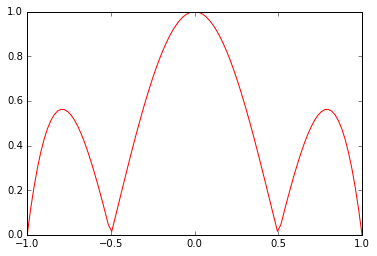

In [2]:
data = numpy.linspace(-1.0,1.0,5)
N = 4
x = numpy.linspace(-1.0, 1.0, 100)

# ====================================================
# Compute the Lagrange basis (\ell_i(x))
def lagrange(x,N):
    lagrange_basis = 1
    i = 2
    for j in xrange(N + 1):
            if i != j:
                lagrange_basis *= (x - data[j]) / (data[i] - data[j])
    return numpy.abs(lagrange_basis)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.plot(x, lagrange(x,4), 'r')
#print numpy.max(x,lagrange_basis)

plt.show()

## Question 4

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and are clearly related to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** (5 points) What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

As we have seen before, the sum of the lagrange basis functions should tend to 1. Thus, I would expect that lebesgue function would approach 1 and perhaps blow up at our endpoints.

**(b)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

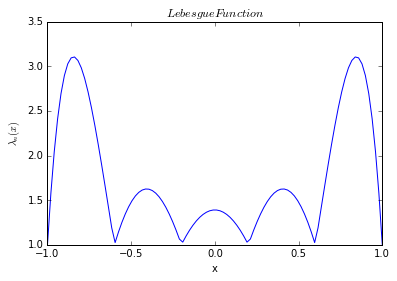

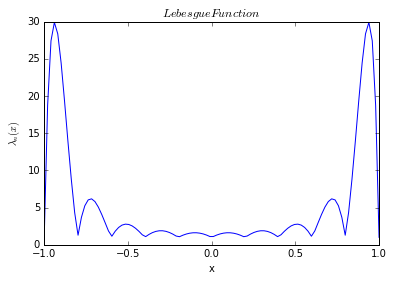

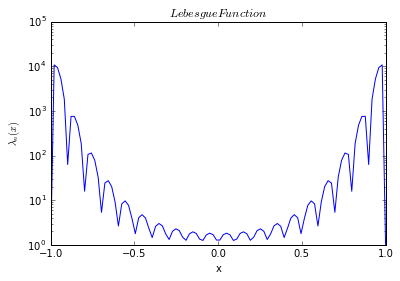

In [3]:
### INSERT CODE HERE
def lebesgue_b(x, N):
    """Return the lebesgue function with equidistant points
    
    :Input:
     - *x* (ndarray) - the linspace we are using for our plot.
     - *N* (integer) - Number of points
     
    :Output:
     - *lebesgue* (ndarray) - Sum of the absolute value of the lagrange basis 
    """
    
    data = numpy.zeros(N+1)
    for i in xrange(N+1):
        data[i] = -1 + (2.0*i) / N
        
    # ====================================================
    # Compute the Lagrange basis (\ell_i(x))
    lagrange_basis = numpy.ones((N + 1, x.shape[0]))
    for i in xrange(N + 1):
        for j in xrange(N + 1):
            if i != j:
                lagrange_basis[i, :] *= (x - data[j]) / (data[i] - data[j])
        lagrange_basis[i, :] = numpy.abs(lagrange_basis[i,:])

    # Calculate full summation
    lebesgue = numpy.zeros(x.shape[0])
    for n in xrange(x.shape[0]): 
        for i in xrange(N+1):
            lebesgue[n] += lagrange_basis[i,n]
    return lebesgue
# ====================================================
x = numpy.linspace(-1.0, 1.0, 100)

# Plot lebesgue funtion for N = 5
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, lebesgue_b(x,5), label="$\lamda_n_{%s}(x)$" % N)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")

# Plot lebesgue funtion for N = 10
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, lebesgue_b(x,10), label="$\lamda_n_{%s}(x)$" % N)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")

# Plot lebesgue funtion for N = 20
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(x, lebesgue_b(x,20), label="$\lamda_n_{%s}(x)$" % N)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")
plt.show()


**Comments**

From the above graphs, it is interesting to note that our N tells us how many 'bumps' the graph has and N+1 tell us how many times our function equals 1. Moreover, while the first two graphs stay near a minimum of 1, it seems with higher Ns, the bumps are forming a parabolic shape that becomes increasing narrower. 

**(c)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = \cos\left( \frac{(2i - 1) \pi}{2 N} \right ) ~~~ i = 1, \ldots, N + 1.
$$
Again comment on what you see in the case $N = 20$.

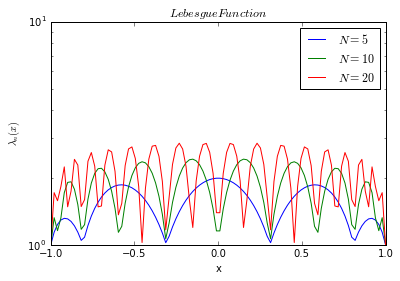

In [4]:
### INSERT CODE HERE
def lebesgue_c(x,N):
    """Return the lebesgue function with Chebychev Nodes
    
    :Input:
     - *x* (ndarray) - the linspace we are using for our plot.
     - *N* (integer) - Number of points
     
    :Output:
     - *lebesgue* (ndarray) - Sum of the absolute value of the lagrange basis 
    """
    
    data = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
    #data = numpy.zeros(N+1)
    #for i in xrange(1,N+2):
        #data[i-1] = numpy.cos(((2.0*i - 1.0)*numpy.pi) / (2.0 * (N+1)))  
# ====================================================
    # Compute the Lagrange basis (\ell_i(x))
    lagrange_basis = numpy.ones((N + 1, x.shape[0]))
    for i in xrange(N + 1):
        for j in xrange(N + 1):
            if i != j:
                lagrange_basis[i, :] *= (x - data[j]) / (data[i] - data[j])
        lagrange_basis[i, :] = numpy.abs(lagrange_basis[i, :])

    # Calculate full summation
    lebesgue = numpy.zeros(x.shape[0])
    for n in xrange(x.shape[0]):
        for i in xrange(N+1):
            lebesgue[n] += lagrange_basis[i,n]
    return lebesgue
# ====================================================
x = numpy.linspace(-1.0, 1.0, 100)

# Plot lebesgue funtion
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, lebesgue_c(x,5), label="$N = %s$" % 5)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")

# Plot lebesgue funtion
axes.plot(x, lebesgue_c(x,10), label="$N = %s$" % 10)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")

# Plot lebesgue funtion
axes.semilogy(x, lebesgue_c(x,20), label="$N = %s$" % 20)
axes.set_title("$Lebesgue Function$")
axes.set_xlabel("x")
axes.set_ylabel("$\lambda_n(x)$")
axes.legend()

plt.show()


**Comments**

Again, N gives us the number of "bumps" that the function has and N+1 tells us the number of times our function is 1. However, one intersting thing to note is that the edges are actually well-behaved unlike before. Moreover, the function's global max is near the center instead of the edges. 

**(d)** (5 points) What do you observe about the Lebesgue function for each of the distribution of points?

In the first equation gives us an equidistant sampling which our interpolating polynomial will pass through. Therefore, we see the lebesgue function pass through each of these equidisant points in the first equation. However, as we have seen in class, we can mimnimize the interpolating error by setting our points equal to the roots of the polynomials. Therefore, part two lets our chebychev nodes to be the roots of the polynomials, minimizing the error.

It is due to this minimization of error that our graphs for the second equation look much nicer and don't blow up at the edges. Furthermore, at the nodes themselves, the chebychev nodes in fact go to 1 but in the case of the equidistant points, the N=20 shows that as we get closer to the edges, we get this error that causes us to miss 1. Therefore, this excersise shows that there is some error when using equidistant points but this error can be minimized if we use the roots of the polynomials as the nodes. 

**(e)** (10 points) Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function at.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$.  Describe what you observe.

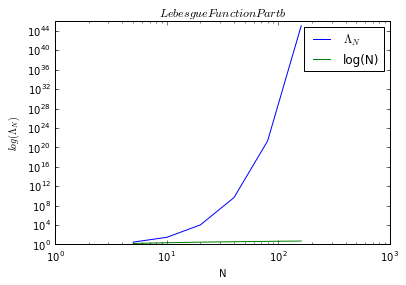

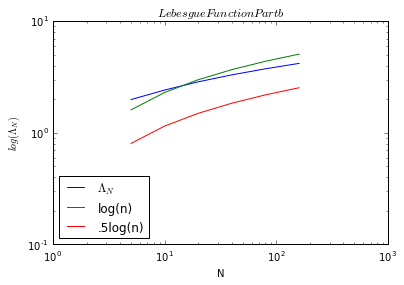

In [5]:
### INSERT CODE HERE
constants_equidistant = [] 
constants_chebychev = []

x = numpy.linspace(-1,1,1000)

N = [5, 10, 20, 40, 80, 160]
for n in N:
    constants_equidistant.append(lebesgue_b(x, n).max())
    constants_chebychev.append(lebesgue_c(x, n).max())
    
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.loglog(N, constants_equidistant, label="$\Lambda_N$")
axes.loglog(N, numpy.log(N), label="log(N)")
axes.set_title("$Lebesgue Function Part b$")
axes.set_xlabel("N")
axes.set_ylabel("$log(\Lambda_N)$")
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.loglog(N, constants_chebychev, label="$\Lambda_N$")
axes.loglog(N, numpy.log(N), label="log(n)")
axes.loglog(N, (.5)*numpy.log(N), label=".5log(n)")
axes.set_title("$Lebesgue Function Part b$")
axes.set_ylabel("$log(\Lambda_N)$")
axes.set_xlabel("N")
axes.legend(loc=3)
plt.show()

**Constants**

Based on our graphs, we have successfully shown that for equidistant points, the lebesgue constants are indeed:

$$\Lambda_n > \mathcal{O}(log(N))$$

However, for the chebychev nodes, we see this intersection with the log(N) graph. Therefore, while our original log(n) graph doesn't prove the inequality. However, by the properties of big O, we can multiply log(N) by any constant since the order will still be log(N). Thus, the above graph also plots $.5log(N)$ and shows that the conclusion we want to prove:

$$\Lambda_N > \mathcal{O}(.5\log N) = \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty$$